# Statistical Modeling

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [8]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy
if not hasattr(scipy.stats, 'chisqrob'):
    scipy.stats.chisqrob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

### Logistic regression

Reference:"David Chaplain - Statistical Modeling"

In [9]:
smoking = pd.read_csv('05_05/whickham.csv')

In [10]:
smoking = smoking[smoking.age < 65]

In [11]:
color = np.where(smoking.smoker == "No", 'skyblue', 'coral')
jitter = 0.05 * (np.random.rand(len(smoking)) - 0.5)

def plotfit(fit):
    pp.scatter(smoking.age, smoking.outcome + jitter, c=color, linewidths=0.2, edgecolors='k', alpha=0.5)
    pp.scatter(smoking.age, fit.predict(smoking), c=color, linewidths=0.2, edgecolors='gray', marker='d')

In [12]:
# Cases of ages 65 and older are remove none of them are alive after 
# 20 years

In [13]:
 smoking['outcome'] = 1*(smoking['outcome'] == 'Alive')

In [15]:
smf.ols('outcome ~ smoker + age', data=smoking).fit()

In [16]:
ols_group_age = smf.ols('outcome ~ smoker + age', data=smoking).fit()

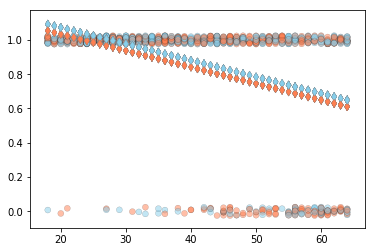

In [17]:
plotfit(ols_group_age)

***Orange*** circles for smokers and non ***blue*** for non-smokers. Jitter has been added so that the points do not lie on top of eachother. The fit is represent using the diamonds at the top.

In [19]:
ols_group_age.params

Intercept        1.264665
smoker[T.Yes]   -0.038738
age             -0.009615
dtype: float64

In [20]:
sm.stats.anova_lm(ols_group_age)

/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/fabian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,0.899981,0.899981,8.181417,4.314608e-03
age,1.0,17.713821,17.713821,161.030213,1.806638e-34
Residual,1068.0,117.483303,0.110003,NaN,NaN


In [21]:
ols_group_age.conf_int()

,0,1
Intercept,1.198828,1.330503
smoker[T.Yes],-0.078622,0.001146
age,-0.011102,-0.008129


#### Logistic Regression:

Is the method of taking standard linear model outputs and using a logistic transformation to output a probablity between 0 and 1. i.e.

Standard linear model (outputs in[-∞, ∞]) --->

Logistic Transformation exp(y)/1+ exp(y) --->

Probablity (in [0,1])

<i>"We can use stat ***model (hence the tilde operator)*** for this which is implement using logit."</i>

In [23]:
logit_smoker_age = smf.logit('outcome ~ smoker + age', data=smoking).fit()

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 7


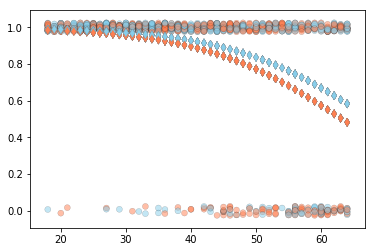

In [24]:
plotfit(logit_smoker_age)

The criteria for logistic regression is not minimizing the mean-square error of the residuals. But rather interpreting the model response as a probability function and maximizing the resulting probability of the observed data.

In [25]:
logit_smoker_age.llf

-371.38650786619064

In [26]:
logit_smoker_age.params

Intercept        6.250847
smoker[T.Yes]   -0.408103
age             -0.092403
dtype: float64

Smoking does recude the risk of being alive by not uniformly, it does so by 0.1 at the upper end of the ages, and less for younger subjects. As shown by this dataset. Note this data set does not represent the general population.

In [28]:
logit_smoker_age.conf_int()

,0,1
Intercept,5.331126,7.170568
smoker[T.Yes],-0.777754,-0.038451
age,-0.109478,-0.075327


In [29]:
logit_smoker_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1071
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                  0.1776
Time:                        15:59:55   Log-Likelihood:                -371.39
converged:                       True   LL-Null:                       -451.59
                                        LLR p-value:                 1.469e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2508      0.469     13.321      0.000       5.331       7.171
smoker[T.Yes]    -0.4081      0.189     -2.164      0.030      -0.778      -0.038
age              -0.0924      0.009    -10.606      0.000      -0.109      -0.075
=================================================================================
"""